In [1]:
file_location='https://raw.githubusercontent.com/nafissaad/Tutorial1/main/Tutorial/Time%20series/TeKnowledGeek/Time%20Series%20forecasting%20using%20ARIMA%20model%20%2C%20Air%20Passenger%20Dateset/AirPassengers.csv'
import pandas as pd
import matplotlib.pyplot as plt
covid_19_dataset=pd.read_csv(file_location)
covid_19_dataset.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [2]:
covid_19_dataset=pd.read_csv('C:\\Users\\nafissaad\\Tutorial\\Full Time Series Example  Time Series Talk\\TeKnowledGeek\\Covid 19 or Novel Corona Virus Future forecasting using Arima model\\covid_19_data.csv')
covid_19_dataset

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [3]:
covid_19_dataset['ObservationDate']=pd.to_datetime(covid_19_dataset['ObservationDate'],infer_datetime_format=True)
indexed_covid_19_dataset=covid_19_dataset.set_index(['ObservationDate'])
indexed_covid_19_dataset.head()                                                      

,SNo,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,,,,
2020-01-22,1,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,2,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2020-01-22,3,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
2020-01-22,4,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,5,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
covid_19_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   SNo              306429 non-null  int64         
 1   ObservationDate  306429 non-null  datetime64[ns]
 2   Province/State   228329 non-null  object        
 3   Country/Region   306429 non-null  object        
 4   Last Update      306429 non-null  object        
 5   Confirmed        306429 non-null  float64       
 6   Deaths           306429 non-null  float64       
 7   Recovered        306429 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 18.7+ MB


In [5]:
covid_data_Bangladesh=indexed_covid_19_dataset['Country/Region']=='India'
covid_Bangladesh_dataset=indexed_covid_19_dataset[covid_data_Bangladesh]
cofvid_Bangladesh_confirmed_case_dataset=covid_Bangladesh_dataset['Confirmed']
covid_Bangladesh_confirmed_agg_dataset=cofvid_Bangladesh_confirmed_case_dataset.groupby(['ObservationDate']).sum()
covid_Bangladesh_confirmed_agg_dataset

ObservationDate
2020-01-30           1.0
2020-01-31           1.0
2020-02-01           1.0
2020-02-02           2.0
2020-02-03           3.0
                 ...    
2021-05-25    27157795.0
2021-05-26    27369093.0
2021-05-27    27555457.0
2021-05-28    27729247.0
2021-05-29    27894800.0
Name: Confirmed, Length: 486, dtype: float64

In [6]:
def plot_graph(df):
    rolmean=df.rolling(window=12).mean()
    rolstd=df.rolling(window=12).std()
    
    orig=plt.plot(df,label='Original')
    mean=plt.plot(rolmean,label='Rolling mean')
    std=plt.plot(rolstd,label='Rolling std')
    plt.legend(loc='best')
    plt.show()

In [7]:
def adcf_test(df):
    from statsmodels.tsa.stattools import adfuller
    plot_graph(df)
    dftest=adfuller(df)
    print('Test statistics ',dftest[0],
          '\nP-value         ',dftest[1],
          '\nThe number of lags used       ',dftest[2],
          '\nnumber of observations used   ',dftest[3])

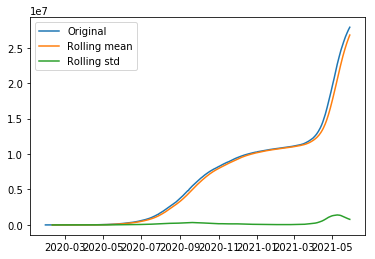

Test statistics  1.791630329205716 
P-value          0.9983322718893117 
The number of lags used        16 
number of observations used    469


In [8]:
adcf_test(covid_Bangladesh_confirmed_agg_dataset)

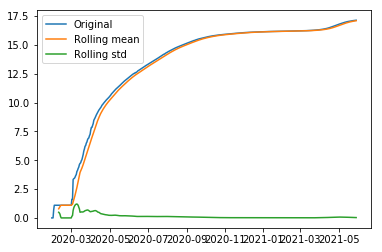

Test statistics  -6.499326478308601 
P-value          1.172547902853699e-08 
The number of lags used        2 
number of observations used    483


In [9]:
#I will remove the trend pard now
import numpy as np
covid_Bangladesh_confirmed_agg_dataset_scaled=np.log(covid_Bangladesh_confirmed_agg_dataset)
adcf_test(covid_Bangladesh_confirmed_agg_dataset_scaled)

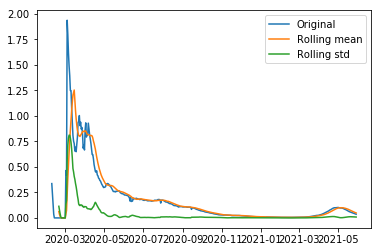

Test statistics  -3.7415732917987183 
P-value          0.0035649697182628154 
The number of lags used        2 
number of observations used    473


In [10]:
ma=covid_Bangladesh_confirmed_agg_dataset_scaled.rolling(window=11).mean()
covid_Bangladesh_confirmed_agg_dataset_scaled_minus_ma=covid_Bangladesh_confirmed_agg_dataset_scaled-ma
covid_Bangladesh_confirmed_agg_dataset_scaled_minus_ma.dropna(inplace=True)
adcf_test(covid_Bangladesh_confirmed_agg_dataset_scaled_minus_ma)

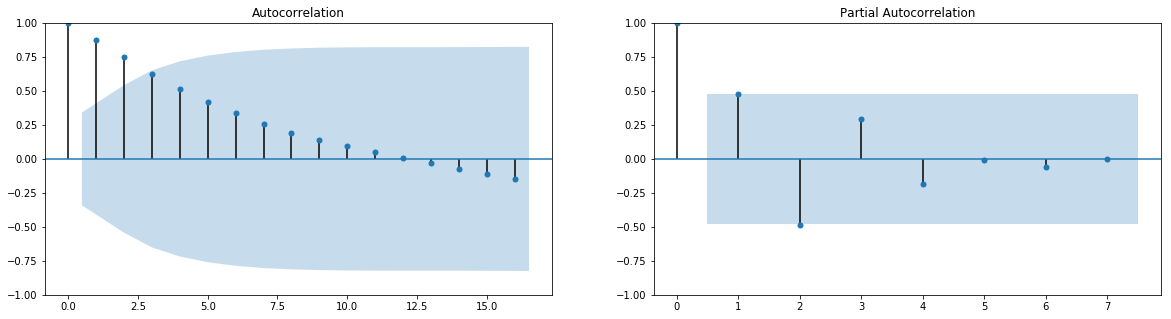

In [11]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

lag_acf=acf(covid_Bangladesh_confirmed_agg_dataset_scaled_minus_ma,nlags=32)
lag_pacf=pacf(covid_Bangladesh_confirmed_agg_dataset_scaled_minus_ma,nlags=16)

fig,ax=plt.subplots(1,2,figsize=(20,5))

plot_acf(lag_acf,ax=ax[0])
plot_pacf(lag_pacf,lags=7,ax=ax[1],method='ywm')
plt.show()

C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\nafissaad\AppData

Test MSE 0.006


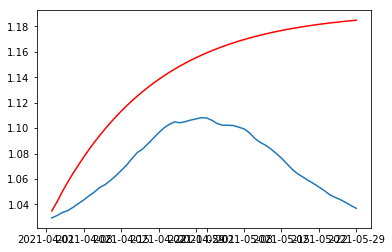

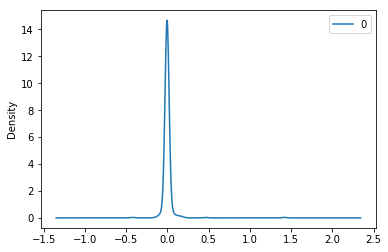

In [12]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
covid_Bangladesh_confirmed_agg_dataset_scaled_minus_ma.dropna(inplace=True)
train,test=train_test_split(covid_Bangladesh_confirmed_agg_dataset_scaled_minus_ma,test_size=0.12,shuffle=False)
model_arima=ARIMA(train,order=(4,0,3))
model_arima_fit=model_arima.fit()

predictions=model_arima_fit.predict(start='2021-04-02',end='2021-05-29')

test_set=np.exp(test)
predict=np.exp(predictions)

from sklearn.metrics import mean_squared_error
error=mean_squared_error(test_set,predict)
print('Test MSE %.3f' % error)

residual=pd.DataFrame(model_arima_fit.resid)


plt.plot(test_set)
plt.plot(predict,color='red')
residual.plot(kind='kde')
plt.show()